In [1]:
import zipfile

path = '/content/drive/MyDrive/doi_10_5061_dryad_qbzkh18fr__v20200820.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [2]:
import os
import zipfile

# ZIP 파일 경로
path = '/content/drive/MyDrive/doi_10_5061_dryad_qbzkh18fr__v20200820.zip'

# ZIP 파일 추출
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./extracted_data')  # 파일을 './extracted_data' 폴더로 추출
zip_object.close()

# 추출된 디렉토리의 파일 확인
extracted_path = './extracted_data'
print("Extracted Files:")
for root, dirs, files in os.walk(extracted_path):
    for file in files:
        print(os.path.join(root, file))


Extracted Files:
./extracted_data/rsos_dream_data.tsv


In [3]:
import pandas as pd

# 예: CSV 파일 읽기
csv_file_path = './extracted_data/sample.csv'  # 적절한 파일 경로로 변경
if os.path.exists(csv_file_path):
    data = pd.read_csv(csv_file_path)
    print("CSV File Content:")
    print(data.head())
else:
    print(f"File {csv_file_path} does not exist.")


File ./extracted_data/sample.csv does not exist.


In [4]:
import os

# 추출된 디렉토리의 파일 확인
extracted_path = './extracted_data'
print("Extracted Files:")
for root, dirs, files in os.walk(extracted_path):
    for file in files:
        print(os.path.join(root, file))


Extracted Files:
./extracted_data/rsos_dream_data.tsv


In [7]:
import pandas as pd

# 예: CSV 파일 읽기
csv_file_path = './extracted_data/rsos_dream_data.tsv'
if os.path.exists(csv_file_path):
    data = pd.read_csv(csv_file_path)
    print("CSV File Content:")
    print(data.head())
else:
    print(f"File {csv_file_path} does not exist.")


ParserError: Error tokenizing data. C error: Expected 15 fields in line 3, saw 19


In [8]:
# 파일 내용 확인
file_path = './extracted_data/rsos_dream_data.tsv'  # 실제 파일 경로

with open(file_path, 'r', encoding='utf-8') as file:
    for i in range(10):  # 처음 10줄 읽기
        print(file.readline())


dream_id	dreamer	description	dream_date	dream_language	text_dream	characters_code	emotions_code	aggression_code	friendliness_code	sexuality_code	Male	Animal	Friends	Family	Dead&Imaginary	Aggression/Friendliness	A/CIndex	F/CIndex	S/CIndex	NegativeEmotions

1	alta	Alta: a detailed dreamer	1957	en	The one at the Meads's house, where it's bigger inside than out; there's a European village just inside, with a cobblestone street and a Pied-Piper sort of man with curly hair, he can do things like juggle - I go up the back stairs [there aren't any in the real house] and then down the other side [since there's a second set, immediately] then down a short empty hallway that turns a corner, where I find a tiny room...a young woman with shoulder-length blonde hair in a pageboy is there, cooking at a stove that almost fills the room...she's nice to me. Now outside, I'm waiting for my aunt to pick me up - she arrives in a little round convertible and we go for a drive, not very far - we cross a litt

In [9]:
import pandas as pd

# 구분자를 지정해 파일 읽기
file_path = './extracted_data/rsos_dream_data.tsv'  # 실제 파일 경로

try:
    data = pd.read_csv(file_path, delimiter='\t')  # 기본은 쉼표(,)지만, 필요시 수정
    print(data.head())
except Exception as e:
    print("Error:", e)


   dream_id dreamer               description dream_date dream_language  \
0         1    alta  Alta: a detailed dreamer       1957             en   
1         2    alta  Alta: a detailed dreamer  8/11/1967             en   
2         3    alta  Alta: a detailed dreamer   8/1/1985             en   
3         4    alta  Alta: a detailed dreamer      1985?             en   
4         5    alta  Alta: a detailed dreamer      1985?             en   

                                          text_dream  \
0  The one at the Meads's house, where it's bigge...   
1  I'm at a family reunion in a large fine house ...   
2  I watch a plane fly past and shortly realize i...   
3  Me pulling the green leaves and berries off so...   
4  I'm in a room that reminds me of (but definite...   

                                     characters_code  \
0                       2ISA, 1MKA, 1FDA, 1IOA, 2ISA   
1                                 2ISA, people, 2ISA   
2           2ISA, 2ISA, 1FSA, 1MBA, 1IOA, 2I

In [5]:
# 필요한 열 이름 리스트
columns_to_use = ['text_dream','emotions_code', 'aggression_code', 'friendliness_code']

# 데이터프레임에서 필요한 열만 선택
filtered_data = data[columns_to_use]

# 결과 확인
print(filtered_data.head())


NameError: name 'data' is not defined

In [10]:
import pandas as pd

# 1. 필요한 열 선택
columns_to_use = ['text_dream', 'emotions_code', 'aggression_code', 'friendliness_code']
filtered_data = data[columns_to_use]

# 2. 가중치 정의
positive_weights = {'AP': 1, 'CO': 2, 'FR': 1.5}
negative_weights = {'SD': -1, 'AG': -2, 'D': -1.5}

# 3. 점수 계산 함수
def calculate_sentiment_score(row):
    total_score = 0
    for column in ['emotions_code', 'aggression_code', 'friendliness_code']:
        if pd.notna(row[column]):
            codes = row[column].split(', ')
            for code in codes:
                if code in positive_weights:
                    total_score += positive_weights[code]
                elif code in negative_weights:
                    total_score += negative_weights[code]
    return total_score

# 4. 점수 계산 및 데이터프레임에 추가
filtered_data['sentiment_score'] = filtered_data.apply(calculate_sentiment_score, axis=1)

# 5. 긍정/부정 분류 함수
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

filtered_data['sentiment'] = filtered_data['sentiment_score'].apply(classify_sentiment)

# 6. 최종 결과 출력
final_result = filtered_data[['text_dream', 'sentiment']]
print(final_result.head())


                                          text_dream sentiment
0  The one at the Meads's house, where it's bigge...   Neutral
1  I'm at a family reunion in a large fine house ...   Neutral
2  I watch a plane fly past and shortly realize i...   Neutral
3  Me pulling the green leaves and berries off so...   Neutral
4  I'm in a room that reminds me of (but definite...   Neutral


<ipython-input-10-4ddc91170fa8>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['sentiment_score'] = filtered_data.apply(calculate_sentiment_score, axis=1)
<ipython-input-10-4ddc91170fa8>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['sentiment'] = filtered_data['sentiment_score'].apply(classify_sentiment)


In [11]:
import pandas as pd

# 1. 필요한 열 선택
columns_to_use = ['text_dream', 'emotions_code', 'aggression_code', 'friendliness_code']
filtered_data = data[columns_to_use].copy()  # 복사본 생성

# 2. 결측치 처리
filtered_data.fillna('', inplace=True)

# 3. 가중치 정의
positive_weights = {'AP': 1, 'CO': 2, 'FR': 1.5}
negative_weights = {'SD': -1, 'AG': -2, 'D': -1.5}

# 4. 점수 계산 함수
def calculate_sentiment_score(row):
    total_score = 0
    for column in ['emotions_code', 'aggression_code', 'friendliness_code']:
        codes = row[column].split(', ')  # 심볼 분리
        for code in codes:
            if code in positive_weights:
                total_score += positive_weights[code]
            elif code in negative_weights:
                total_score += negative_weights[code]
    return total_score

# 5. 점수 계산
filtered_data['sentiment_score'] = filtered_data.apply(calculate_sentiment_score, axis=1)

# 6. 긍정/부정 분류 함수
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

filtered_data['sentiment'] = filtered_data['sentiment_score'].apply(classify_sentiment)

# 7. 최종 결과
final_result = filtered_data[['text_dream', 'sentiment']]
print(final_result.head())

# 디버깅: 특정 행의 심볼 확인
print(filtered_data[['emotions_code', 'aggression_code', 'friendliness_code']].iloc[0])  # 첫 번째 행



                                          text_dream sentiment
0  The one at the Meads's house, where it's bigge...   Neutral
1  I'm at a family reunion in a large fine house ...   Neutral
2  I watch a plane fly past and shortly realize i...   Neutral
3  Me pulling the green leaves and berries off so...   Neutral
4  I'm in a room that reminds me of (but definite...   Neutral
emotions_code                 
aggression_code       2IKA > Q
friendliness_code    2IKA 4> Q
Name: 0, dtype: object


In [ ]:
# 각 열의 고유 값 확인
print("Unique values in 'emotions_code':", filtered_data['emotions_code'].unique())
print("Unique values in 'aggression_code':", filtered_data['aggression_code'].unique())
print("Unique values in 'friendliness_code':", filtered_data['friendliness_code'].unique())


Unique values in 'emotions_code': ['' 'SD 2IKA' 'SD 1ISA, AP D, AP D' ...
 'SD 1MSA, AP 1MSA, SD 1MSA, HA 2ISA, SD 1IKA, SD D' 'HA D, AN D, SD D'
 'AP 2ISA, SD 1MSA, AP D']
Unique values in 'aggression_code': ['2IKA > Q' 'D > Q, Q > 2ISA' 'It PRP >, It PRP >, D > 1FKA' ...
 'D > 2IKA, 2ISA > D, D > Q, 1MKA > Q, D > 1MSA'
 '1ANI > D, 1ANI > Q, 1ISA 1> Q' '2IKA > us, 2ISA > D, 2IKA > us']
Unique values in 'friendliness_code': ['2IKA 4> Q' '' '1IKA 4> Q, 2ISA 4> 2ISA' ...
 '1IKA 4> D, D 4> him, 2IKA 4> 1MAA'
 'D 4> Q, it PRP 4>, 1FSA 4> Q, D 4> Q' 'D 4> 2IKA, Q 4> Q, D 4> 2IKA']


In [ ]:
# 모든 심볼 추출 및 딕셔너리 정의된 값과 비교
all_symbols = set()

for column in ['emotions_code', 'aggression_code', 'friendliness_code']:
    filtered_data[column].fillna('', inplace=True)  # NaN 값은 빈 문자열로 대체
    for values in filtered_data[column].str.split(', '):  # 심볼 분리
        all_symbols.update(values)

# 정의되지 않은 심볼 찾기
undefined_symbols = all_symbols - set(positive_weights.keys()) - set(negative_weights.keys())
print("Undefined symbols:", undefined_symbols)


Undefined symbols: {'', 'D 4> secretary', '1IOA 4> 1IKB', '1FMA 4> 2ISA', '2ISA 4> 1ANI', 'D > 1MSA', 'D 4> babies', '1FKA > 1FSA', '2ISA > 1IOA', '1ANI 4> 2IKA', 'D > Clark', 'Q > 1IIC', 'D 4> Anna', 'HA 1IFA', 'D 4> it', '1ANI > 1FKA', '1IIC 4> Q', 'its PRP >', '1FDA > 1MSA', 'D > husband', 'AN 2ICC', 'HA 2IWA', 'D > Cynthia', '1FWA > 1FSA', '1IFA > 1MKA', 'D 4> Mirabelle', 'D > Ezra', 'D 4> husband', '1MKA 4> We', '1FDA 4> 1IFA', 'D > Andy', 'CO 1FDA', 'D > We', '1MAA 4> 2IKA', 'D > 1FKA', 'HA 1ISA', '1IIA 4> 2ISA', '1FSA 4> him', '1MKA > 1IOA', 'D 4> Judith', 'D > Jenny', 'D > Grandma', '2ISA > 1FSA', 'themselves PRP 4>', '1FDA > 1FSA', 'HA 2IAA', 'D 4> B', 'Q 4> 2ICC', '1FSA 4> 1MAA', 'D > Ruth', '1MSA 4> 1IEA', 'D > 1IIC', '2IBA > 2IBA', '1FKA > 1FMA', 'D 4> girls', 'HA 1MHA', '2ISA 4> us', 'D > straight', '1FKA 4> 1ANI', '2IDA > 1IKA', '2IDA 4> him', '1MAA 4> 1MAA', 'AN 1IKA', '1MSA > D', 'D 4> Angel', '1MKA 4> 2IAA', '2ISA 4> 1ICC', 'SD 2ICC', '2ANI > 1MSA', '2ICC 4> 2ICC', '1M

<ipython-input-16-5438d97d5bbe>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_data[column].fillna('', inplace=True)  # NaN 값은 빈 문자열로 대체


In [12]:
import pandas as pd

# 1. 데이터프레임 준비
# 필요 열만 선택 (dream 텍스트와 심볼들)
columns_to_use = ['text_dream', 'emotions_code', 'aggression_code', 'friendliness_code']
filtered_data = data[columns_to_use].copy()

# NaN 값 처리
filtered_data.fillna('', inplace=True)

# 2. 심볼 가중치 정의
positive_weights = {
    'AP': 1,       # Approval
    'HA': 1.5,     # Happy
    'FR': 1.5,     # Friendly
    'CO': 2,       # Cooperative
    'Q': 0.5,      # Question (중립적이나 약간 긍정)
    '2IKA': 0.8,   # Positive interaction
    '1IKA': 0.8,   # Individual positive interaction
}

negative_weights = {
    'SD': -1,      # Sadness
    'AG': -2,      # Aggression
    'D': -1.5,     # Disruptive
    'AN': -1,      # Anger
    'PRP': -0.5,   # Pronoun-based context (부정적인 해석 가능)
    '1ANI': -0.8,  # Negative personal interaction
    '2ISA': -1.2,  # Negative interaction between two people
}

# 기본적으로 정의되지 않은 심볼은 중립(0)으로 처리합니다.

# 3. 점수 계산 함수
def calculate_sentiment_score(row):
    total_score = 0
    for column in ['emotions_code', 'aggression_code', 'friendliness_code']:
        if pd.notna(row[column]):
            codes = row[column].split(', ')  # 심볼 분리
            for code in codes:
                code = code.strip()  # 공백 제거
                if code in positive_weights:
                    total_score += positive_weights[code]
                elif code in negative_weights:
                    total_score += negative_weights[code]
                else:
                    total_score += 0  # 정의되지 않은 심볼은 0으로 처리
    return total_score

# 4. 점수 계산 및 데이터프레임에 추가
filtered_data['sentiment_score'] = filtered_data.apply(calculate_sentiment_score, axis=1)

# 5. 긍정/부정/중립 분류 함수
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

filtered_data['sentiment'] = filtered_data['sentiment_score'].apply(classify_sentiment)

# 6. 최종 결과 출력
final_result = filtered_data[['text_dream', 'sentiment']]
print(final_result.head())

# 7. (선택) CSV 파일로 저장
final_result.to_csv('dream_sentiment_analysis.csv', index=False)
print("Results saved to 'dream_sentiment_analysis.csv'")


                                          text_dream sentiment
0  The one at the Meads's house, where it's bigge...   Neutral
1  I'm at a family reunion in a large fine house ...   Neutral
2  I watch a plane fly past and shortly realize i...   Neutral
3  Me pulling the green leaves and berries off so...   Neutral
4  I'm in a room that reminds me of (but definite...   Neutral
Results saved to 'dream_sentiment_analysis.csv'


In [ ]:
print(filtered_data[['emotions_code', 'aggression_code', 'friendliness_code']].head(10))


                           emotions_code  \
0                                          
1                                SD 2IKA   
2                    SD 1ISA, AP D, AP D   
3                          SD 2ISA, SD D   
4  AP D, AP D, AP 1MSA, CO D, SD D, AP D   
5                                HA 1FSA   
6           AN 1ISA, AN D, SD 2ISA, AN D   
7                             AP D, SD D   
8                                          
9                                          

                                     aggression_code        friendliness_code  
0                                           2IKA > Q                2IKA 4> Q  
1                                    D > Q, Q > 2ISA                           
2                       It PRP >, It PRP >, D > 1FKA                           
3                Q > Q, 2ISA > Q, 2ISA > Q, D > 1MSA  1IKA 4> Q, 2ISA 4> 2ISA  
4  1MSA > D, Q > Q, D > 2IKA, D > 2IKA, D > 1MSA,...                   D 4> Q  
5                                  

In [ ]:
import pandas as pd
import re


# 1. 데이터프레임 준비
columns_to_use = ['text_dream', 'emotions_code', 'aggression_code', 'friendliness_code']
filtered_data = data[columns_to_use].copy()
filtered_data.fillna('', inplace=True)

# 2. 심볼 가중치 정의
positive_weights = {
    'AP': 1, 'HA': 1.5, 'FR': 1.5, 'CO': 2, 'Q': 0.5, '2IKA': 0.8, '1IKA': 0.8
}
negative_weights = {
    'SD': -1, 'AG': -2, 'D': -1.5, 'AN': -1, 'PRP': -0.5, '1ANI': -0.8, '2ISA': -1.2
}

# 3. 점수 계산 함수
def calculate_sentiment_score(row):
    total_score = 0
    for column in ['emotions_code', 'aggression_code', 'friendliness_code']:
        if pd.notna(row[column]):
            # 심볼 분리
            codes = re.split(r'[,\s>]+', row[column])  # 쉼표, 공백, > 등을 기준으로 분리
            for code in codes:
                code = code.strip()  # 공백 제거
                if code:  # 빈 문자열이 아닌 경우만 처리
                    if code in positive_weights:
                        total_score += positive_weights[code]
                    elif code in negative_weights:
                        total_score += negative_weights[code]
                    else:
                        print(f"Undefined code: '{code}'")  # 정의되지 않은 심볼 디버깅
    return total_score


# 4. 점수 계산 및 분류
filtered_data['sentiment_score'] = filtered_data.apply(calculate_sentiment_score, axis=1)

def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

filtered_data['sentiment'] = filtered_data['sentiment_score'].apply(classify_sentiment)

# 5. 최종 결과 출력
final_result = filtered_data[['text_dream', 'sentiment']]
print(final_result.head())

# 6. (선택) CSV 파일로 저장
final_result.to_csv('dream_sentiment_analysis.csv', index=False)
print("Results saved to 'dream_sentiment_analysis.csv'")


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Undefined code: 'him'
Undefined code: '4'
Undefined code: '1FSA'
Undefined code: '4'
Undefined code: 'him'
Undefined code: '4'
Undefined code: '1FKA'
Undefined code: '1MKA'
Undefined code: '4'
Undefined code: '1FSA'
Undefined code: '4'
Undefined code: '4'
Undefined code: 'we'
Undefined code: '4'
Undefined code: '1MKA'
Undefined code: '1MKA'
Undefined code: '1FWA'
Undefined code: '1MSA'
Undefined code: '1FWA'
Undefined code: '1MSA'
Undefined code: '1FSA'
Undefined code: '1FSA'
Undefined code: '4'
Undefined code: 'him'
Undefined code: '1IOA'
Undefined code: '1MSA'
Undefined code: '1IOA'
Undefined code: '1MSA'
Undefined code: '1MSA'
Undefined code: '1IOA'
Undefined code: '1'
Undefined code: '4'
Undefined code: '1MSA'
Undefined code: '4'
Undefined code: '1MSA'
Undefined code: '4'
Undefined code: '1MSA'
Undefined code: '1MSA'
Undefined code: '4'
Undefined code: '1MSA'
Undefined code: '1FKA'
Undefined code: '1FSA'
Undefined code: '1MSA'
Undefined code: '1F

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import re

# 데이터프레임 준비
columns_to_use = ['text_dream', 'emotions_code', 'aggression_code', 'friendliness_code']
filtered_data = data[columns_to_use].copy()
filtered_data.fillna('', inplace=True)

# 심볼 가중치 정의
positive_weights = {'AP': 1, 'HA': 1.5, 'FR': 1.5, 'CO': 2, 'Q': 0.5, '2IKA': 0.8, '1IKA': 0.8}
negative_weights = {'SD': -1, 'AG': -2, 'D': -1.5, 'AN': -1, 'PRP': -0.5, '1ANI': -0.8, '2ISA': -1.2}
neutral_weights = {'Q': 0.0, 'it': 0.0}

# 점수 계산 함수
def calculate_sentiment_score(row):
    total_score = 0
    for column in ['emotions_code', 'aggression_code', 'friendliness_code']:
        if pd.notna(row[column]):
            codes = re.split(r'[,\s>]+', row[column])  # 쉼표, 공백, > 등을 기준으로 분리
            for code in codes:
                code = code.strip()  # 공백 제거
                if code in positive_weights:
                    total_score += positive_weights[code]
                elif code in negative_weights:
                    total_score += negative_weights[code]
                elif code in neutral_weights:  # 중립 심볼
                    total_score += neutral_weights[code]
                else:
                    print(f"Undefined code: '{code}'")  # 미정의 심볼
    return total_score

# 점수 계산 및 분류
filtered_data['sentiment_score'] = filtered_data.apply(calculate_sentiment_score, axis=1)

def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

filtered_data['sentiment'] = filtered_data['sentiment_score'].apply(classify_sentiment)

# 최종 결과
final_result = filtered_data[['text_dream', 'sentiment']]
print(final_result.head())

# CSV 파일 저장
final_result.to_csv('dream_sentiment_analysis.csv', index=False)
print("Results saved to 'dream_sentiment_analysis.csv'")


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Undefined code: '4'
Undefined code: ''
Undefined code: '1ISA'
Undefined code: ''
Undefined code: '1MKA'
Undefined code: '1FSA'
Undefined code: '1MKA'
Undefined code: '4'
Undefined code: '4'
Undefined code: ''
Undefined code: '1MSA'
Undefined code: '1FKA'
Undefined code: '1MSA'
Undefined code: '1MSA'
Undefined code: '4'
Undefined code: ''
Undefined code: '1FSA'
Undefined code: '4'
Undefined code: '1MKA'
Undefined code: 'we'
Undefined code: '1FSA'
Undefined code: '4'
Undefined code: '4'
Undefined code: '4'
Undefined code: '1MSA'
Undefined code: '1FSA'
Undefined code: '1'
Undefined code: '4'
Undefined code: ''
Undefined code: ''
Undefined code: '4'
Undefined code: '1MSA'
Undefined code: '4'
Undefined code: '1MSA'
Undefined code: '4'
Undefined code: '4'
Undefined code: '2IDA'
Undefined code: 'we'
Undefined code: '2IOA'
Undefined code: '1FSA'
Undefined code: '4'
Undefined code: '1FSA'
Undefined code: '4'
Undefined code: 'us'
Undefined code: '1FSA'
Undefin

KeyboardInterrupt: 

In [ ]:
undefined_symbols = set()
for column in ['emotions_code', 'aggression_code', 'friendliness_code']:
    for row in filtered_data[column]:
        codes = re.split(r'[,\s>]+', row)
        undefined_symbols.update({code.strip() for code in codes if code.strip() and code not in positive_weights and code not in negative_weights and code not in neutral_weights})

print("Undefined symbols:", undefined_symbols)


Undefined symbols: {'image', 'humans', 'Armenian', 'bodies', 'Virginia', '1FDA', '1IIC', 'pet', 'Richard', 'Jody', 'B', 'Ringo', '1IHA', 'lion', 'Willie', 'Al', 'Phillip', 'Wendy', 'Dan', 'Alberto', 'Garfunkel', 'Dirk', 'Frederick', 'female', 'Raquel', 'Jared', 'body', 'you', 'family', 'Ted', 'Bradley', 'kids', 'Jake', 'Arlie', 'Bob', '1MBA', 'Uncle', 'bear', '2IOA', 'WOMAN2IDA', 'general', 'Kathee', 'Puerto', '1MKA', 'Izzy', 'Luke', 'cop', 'Christie', '2ANI', 'Joan', '2ICA', '2IMA', 'puppies', 'Ezra', '1IOA', 'Scott', 'children', 'themselves', 'Jerry', 'waitress', 'fish', 'someone', 'Maureen', '2IRA', '1FSA', '1MHA', 'Ruth', 'Anna', 'friends', 'straight', 'father', 'don', 'Bonita', '2ICC', 'person', 'Ron', 'artists', 'shrimp', 'its', 'Theodore', 'beau', '1ICA', 'grandpa', 'fellow', 'Celia', 'lots', '1IIA', 'boys', 'Derek', 'Clayton', '2IDA', '2IAA', 'Oscar', 'ÒWatch', 'Matthew', 'secretary', '___________', 'INDIAN1IEA', '1ICC', 'Nate', 'deceased', 'Z.', 'Silas', 'women', 'Susie', 'dog

In [ ]:
# 정의되지 않은 심볼 수 계산
undefined_symbols = set()

# 심볼 데이터 분석
for column in ['emotions_code', 'aggression_code', 'friendliness_code']:
    for row in filtered_data[column]:
        if pd.notna(row):
            codes = re.split(r'[,\s>]+', row)
            undefined_symbols.update({
                code.strip() for code in codes if code.strip() and
                code not in positive_weights and
                code not in negative_weights and
                code not in neutral_weights
            })

# 출력: 정의되지 않은 심볼의 개수
print(f"Number of undefined symbols: {len(undefined_symbols)}")


Number of undefined symbols: 302


In [ ]:
from collections import Counter

# 심볼 빈도 계산
symbol_counter = Counter()

# 심볼 데이터 분석
for column in ['emotions_code', 'aggression_code', 'friendliness_code']:
    for row in filtered_data[column]:
        if pd.notna(row):
            codes = re.split(r'[,\s>]+', row)
            symbol_counter.update([
                code.strip() for code in codes if code.strip() and
                code not in positive_weights and
                code not in negative_weights and
                code not in neutral_weights
            ])

# 3번 이상 등장한 심볼 추출
frequent_symbols = {symbol: count for symbol, count in symbol_counter.items() if count >= 3}

# 출력
print("Symbols appearing 3 or more times:")
print(frequent_symbols)


Symbols appearing 3 or more times:
{'1ISA': 1278, '1MSA': 13609, '1FSA': 9562, '1IRA': 62, '1MKA': 4515, '1FWA': 189, '1FKA': 3187, '1IOA': 1596, 'you': 1527, '2IDA': 1227, '2IIC': 277, '1MHA': 159, '1MAA': 500, '1IKB': 311, '1IFA': 296, '1FDA': 126, '2IKB': 65, '1ICC': 165, '2ANI': 355, 'You': 215, '1FRA': 51, '1IIC': 139, 'himself': 137, '2ICC': 265, 'our': 82, '2IAA': 201, 'Our': 6, '2IWA': 10, '1FMA': 528, '2IRA': 31, 'your': 15, '1IHA': 11, '2IBA': 32, '2IEA': 36, 'AP1IKA': 7, '1ICA': 3, 'itself': 39, 'CO1IKA': 3, '1IEA': 63, '2IOA': 41, '1IIA': 12, '2IMA': 8, 'It': 1176, '1': 3655, 'we': 1009, '1MBA': 34, '2IHA': 8, 'us': 944, 'woman': 10, 'their': 23, 'guy': 7, 'themselves': 62, 'person': 4, 'husband': 4, 'children': 3, 'girl': 8, 'We': 29, '1MFA': 41, 'yourself': 9, 'son': 4, 'male': 3, 'body': 19, 'family': 8, 'bodies': 8, 'John': 3, 'father': 8, 'monster': 3, 'people': 10, 'Grandma': 5, 'Richard': 3, '2ICA': 6, 'its': 11, 'married': 4, 'principal': 3, 'Juliet': 3, 'daughter':

In [ ]:
from collections import Counter

# 심볼 빈도 계산
symbol_counter = Counter()

# 심볼 데이터 분석
for column in ['emotions_code', 'aggression_code', 'friendliness_code']:
    for row in filtered_data[column]:
        if pd.notna(row):
            codes = re.split(r'[,\s>]+', row)
            symbol_counter.update([
                code.strip() for code in codes if code.strip() and
                code not in positive_weights and
                code not in negative_weights and
                code not in neutral_weights
            ])

# 3번 이상 등장한 심볼 추출
frequent_symbols = {symbol: count for symbol, count in symbol_counter.items() if count >= 3}

# 출력
print("Symbols appearing 3 or more times:")
print(frequent_symbols)

# 3번 이상 등장한 심볼의 개수 출력
print(f"Number of symbols appearing 3 or more times: {len(frequent_symbols)}")


NameError: name 'filtered_data' is not defined

In [ ]:
# 모든 열 이름과 각 열에서 10개의 데이터를 출력
def preview_dataset(data, num_rows=10):
    for column in data.columns:
        print(f"Column: {column}")
        print(data[column].head(num_rows))
        print("-" * 50)

# 데이터셋 미리보기
preview_dataset(data, num_rows=10)


NameError: name 'data' is not defined

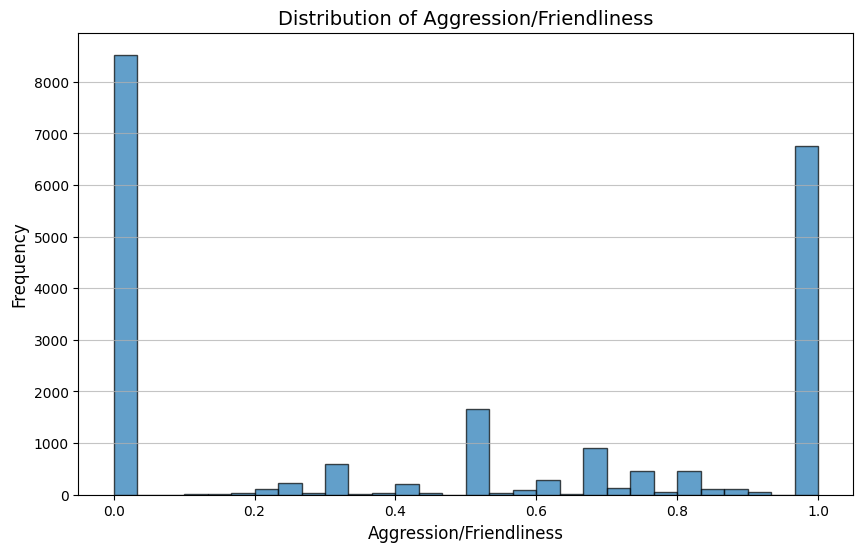

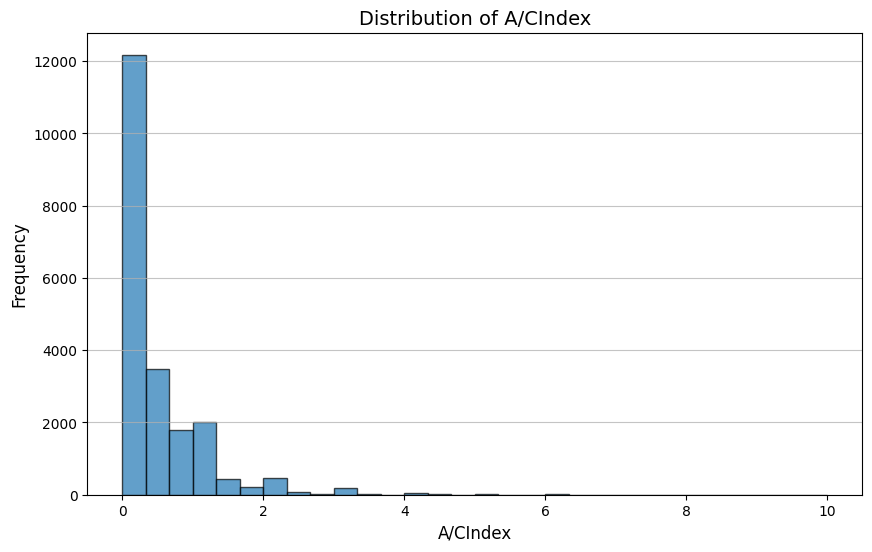

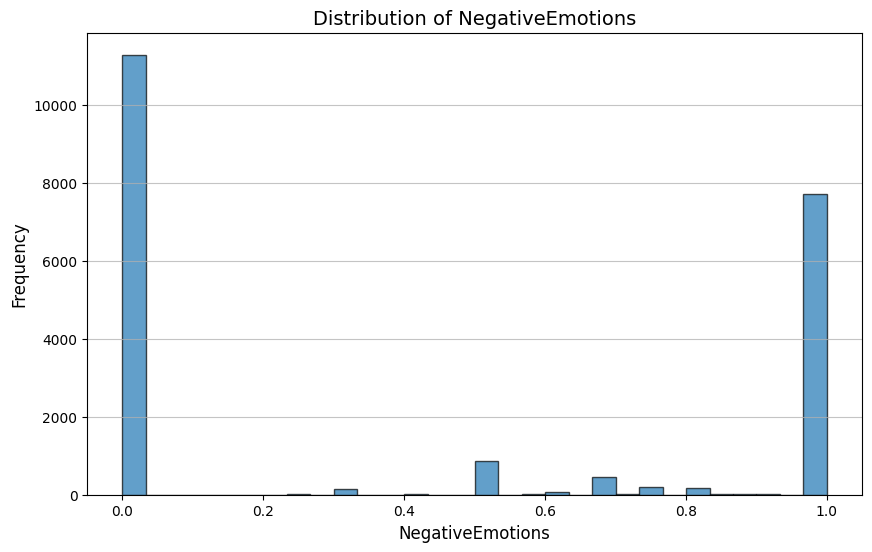

In [16]:
import matplotlib.pyplot as plt

# 데이터 분포 시각화 함수
def plot_distribution(column_name, data):
    plt.figure(figsize=(10, 6))
    plt.hist(data[column_name].dropna(), bins=30, alpha=0.7, edgecolor='black')
    plt.title(f"Distribution of {column_name}", fontsize=14)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

# 분포 확인할 칼럼 리스트
columns_to_check = ['Aggression/Friendliness', 'A/CIndex', 'NegativeEmotions']

# 각 칼럼의 분포 시각화
for column in columns_to_check:
    if column in data.columns:
        plot_distribution(column, data)
    else:
        print(f"Column {column} does not exist in the dataset.")


In [17]:
def create_labels(row):
    # 1순위: Aggression/Friendliness (A/F) 우선 평가
    if row['Aggression/Friendliness'] > 0.5:
        return 'Positive'
    elif row['Aggression/Friendliness'] < 0.5:
        return 'Negative'
    elif row['Aggression/Friendliness'] == 0.5:
        # 2순위: NegativeEmotions 평가
        if row['NegativeEmotions'] > 0.5:
            return 'Negative'
        elif row['NegativeEmotions'] < 0.5:
            return 'Positive'
        else:
            return 'Neutral'

# 정답 레이블 생성
data['ground_truth'] = data.apply(create_labels, axis=1)

# 결과 확인
print(data[['Aggression/Friendliness', 'NegativeEmotions', 'ground_truth']].head())


   Aggression/Friendliness  NegativeEmotions ground_truth
0                    0.000               0.0     Negative
1                    1.000               1.0     Positive
2                    1.000               1.0     Positive
3                    1.000               1.0     Positive
4                    0.875               1.0     Positive


ground_truth
Negative    10695
Positive    10224
Neutral        81
Name: count, dtype: int64


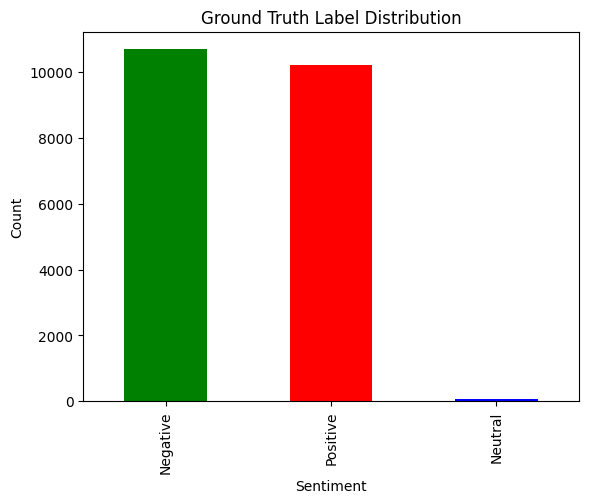

In [18]:
# 정답 레이블 분포 확인
print(data['ground_truth'].value_counts())

# 시각화
import matplotlib.pyplot as plt

data['ground_truth'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title("Ground Truth Label Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 긍정, 부정, 중립 데이터를 분리
positive_data = data[data['ground_truth'] == 'Positive']
negative_data = data[data['ground_truth'] == 'Negative']
neutral_data = data[data['ground_truth'] == 'Neutral']

# 긍정 데이터 분리: 60% 학습, 20% 검증, 20% 테스트
positive_train, positive_temp = train_test_split(positive_data, test_size=0.4, random_state=42)
positive_val, positive_test = train_test_split(positive_temp, test_size=0.5, random_state=42)

# 부정 데이터 분리: 60% 학습, 20% 검증, 20% 테스트
negative_train, negative_temp = train_test_split(negative_data, test_size=0.4, random_state=42)
negative_val, negative_test = train_test_split(negative_temp, test_size=0.5, random_state=42)

# 중립 데이터 분리: 60% 학습, 20% 검증, 20% 테스트
neutral_train, neutral_temp = train_test_split(neutral_data, test_size=0.4, random_state=42)
neutral_val, neutral_test = train_test_split(neutral_temp, test_size=0.5, random_state=42)

# 학습, 검증, 테스트 데이터를 결합
train_data = pd.concat([positive_train, negative_train, neutral_train]).sample(frac=1, random_state=42)  # 셔플링
val_data = pd.concat([positive_val, negative_val, neutral_val]).sample(frac=1, random_state=42)          # 셔플링
test_data = pd.concat([positive_test, negative_test, neutral_test]).sample(frac=1, random_state=42)      # 셔플링

# 확인
print(f"Train data: {len(train_data)} ({train_data['ground_truth'].value_counts().to_dict()})")
print(f"Validation data: {len(val_data)} ({val_data['ground_truth'].value_counts().to_dict()})")
print(f"Test data: {len(test_data)} ({test_data['ground_truth'].value_counts().to_dict()})")

# 결과 저장
train_data.to_csv('train_data.csv', index=False)
val_data.to_csv('val_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

print("Data saved: train_data.csv, val_data.csv, test_data.csv")


KeyError: 'ground_truth'

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
import torch
import torch.nn as nn
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
import pandas as pd

# 1. 데이터 로드
train_data = pd.read_csv('train_data.csv')  # Train 데이터
val_data = pd.read_csv('val_data.csv')      # Validation 데이터
test_data = pd.read_csv('test_data.csv')    # Test 데이터

# 2. 데이터 준비
X_train = train_data['text_dream']  # 텍스트 데이터
y_train = train_data['ground_truth']  # 정답 레이블

X_val = val_data['text_dream']  # 텍스트 데이터
y_val = val_data['ground_truth']  # 정답 레이블

# 정답 레이블을 숫자로 변환
label_mapping = {'Positive': 0, 'Negative': 1, 'Neutral': 2}
y_train_enc = [label_mapping[label] for label in y_train]
y_val_enc = [label_mapping[label] for label in y_val]

# 3. 토크나이저 로드 및 데이터 토큰화
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

# Train 데이터 토큰화
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=128, return_tensors="pt")

# Validation 데이터 토큰화
val_encodings = tokenizer(list(X_val), truncation=True, padding=True, max_length=128, return_tensors="pt")

# 4. PyTorch Dataset 생성
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

train_dataset = SentimentDataset(train_encodings, y_train_enc)
val_dataset = SentimentDataset(val_encodings, y_val_enc)

# 5. 모델 로드
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased-finetuned-sst-2-english"
)

# 출력 레이어 수정 (3개의 레이블로 변경)
model.classifier = torch.nn.Linear(model.classifier.in_features, 3)
model.num_labels = 3

# 6. Fine-Tuning 하이퍼파라미터 설정
training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy="epoch",  # 매 에포크마다 검증
    logging_strategy="steps",  # 매 스텝마다 로그 출력
    logging_steps=10,  # 로그 출력 주기 (10 스텝마다)
    learning_rate=1e-5,
    per_device_train_batch_size=32,
    warmup_steps=600,
    num_train_epochs=5,
    weight_decay=0.01,
    logging_dir='./logs',
)

# 7. Trainer 생성
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
)

# 8. 모델 학습
trainer.train()

# 9. 모델 저장
model.save_pretrained('./sentiment_model')
tokenizer.save_pretrained('./sentiment_model')

print("Fine-tuning complete. Model and tokenizer saved to './sentiment_model'.")


<ipython-input-21-abccafd48b71>:73: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,0.693500,0.653238
2,0.563700,0.517944
3,0.513200,0.498482
4,0.380400,0.516678
5,0.342100,0.535412


Fine-tuning complete. Model and tokenizer saved to './sentiment_model'.


In [ ]:
import torch
import torch.nn as nn
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# 1. 데이터 로드
train_data = pd.read_csv('train_data.csv')  # Train 데이터
val_data = pd.read_csv('val_data.csv')      # Validation 데이터
test_data = pd.read_csv('test_data.csv')    # Test 데이터

# 2. 데이터 준비
X_train = train_data['text_dream']
y_train = train_data['ground_truth']

X_val = val_data['text_dream']
y_val = val_data['ground_truth']

# 정답 레이블을 숫자로 변환
label_mapping = {'Positive': 0, 'Negative': 1, 'Neutral': 2}
y_train_enc = [label_mapping[label] for label in y_train]
y_val_enc = [label_mapping[label] for label in y_val]

# 3. 토크나이저 로드 및 데이터 토큰화
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=128, return_tensors="pt")
val_encodings = tokenizer(list(X_val), truncation=True, padding=True, max_length=128, return_tensors="pt")

# 4. PyTorch Dataset 생성
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

train_dataset = SentimentDataset(train_encodings, y_train_enc)
val_dataset = SentimentDataset(val_encodings, y_val_enc)

# 5. 모델 로드
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased-finetuned-sst-2-english"
)
model.classifier = torch.nn.Linear(model.classifier.in_features, 3)
model.num_labels = 3

# 6. Fine-Tuning 하이퍼파라미터 설정
training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy="epoch",
    logging_strategy="steps",
    logging_steps=10,
    learning_rate=1e-5,
    per_device_train_batch_size=32,
    warmup_steps=600,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
)

# 7. 메트릭 계산 함수
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), dim=1)  # 예측값
    accuracy = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average='weighted')
    return {"accuracy": accuracy, "f1": f1}

# 8. Trainer 생성
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,  # 메트릭 계산 추가
)

# 9. 모델 학습
trainer.train()

# 10. 모델 저장
model.save_pretrained('./sentiment_model')
tokenizer.save_pretrained('./sentiment_model')

print("Fine-tuning complete. Model and tokenizer saved to './sentiment_model'.")


<ipython-input-22-b8073c63b38e>:76: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.684600,0.635309,0.668095,0.654966
2,0.562000,0.524103,0.750000,0.747694
3,0.528900,0.513891,0.758571,0.756531


Fine-tuning complete. Model and tokenizer saved to './sentiment_model'.


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split


# 중립 데이터 제거
filtered_data = data[data['ground_truth'] != 'Neutral']

# 확인
print(f"Data after removing Neutral: {filtered_data['ground_truth'].value_counts()}")

# 60%, 20%, 20% 분할
positive_data = filtered_data[filtered_data['ground_truth'] == 'Positive']
negative_data = filtered_data[filtered_data['ground_truth'] == 'Negative']

# 긍정 데이터 분할
positive_train, positive_temp = train_test_split(positive_data, test_size=0.4, random_state=42)
positive_val, positive_test = train_test_split(positive_temp, test_size=0.5, random_state=42)

# 부정 데이터 분할
negative_train, negative_temp = train_test_split(negative_data, test_size=0.4, random_state=42)
negative_val, negative_test = train_test_split(negative_temp, test_size=0.5, random_state=42)

# 데이터 결합 및 셔플링
train_data = pd.concat([positive_train, negative_train]).sample(frac=1, random_state=42)
val_data = pd.concat([positive_val, negative_val]).sample(frac=1, random_state=42)
test_data = pd.concat([positive_test, negative_test]).sample(frac=1, random_state=42)

# 필요한 칼럼만 유지
train_data = train_data[['text_dream', 'ground_truth']]
val_data = val_data[['text_dream', 'ground_truth']]
test_data = test_data[['text_dream', 'ground_truth']]

# 확인
print(f"Train data: {len(train_data)} ({train_data['ground_truth'].value_counts().to_dict()})")
print(f"Validation data: {len(val_data)} ({val_data['ground_truth'].value_counts().to_dict()})")
print(f"Test data: {len(test_data)} ({test_data['ground_truth'].value_counts().to_dict()})")

# 결과 저장
train_data.to_csv('train_data.csv', index=False)
val_data.to_csv('val_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

print("Data saved: train_data.csv, val_data.csv, test_data.csv")


Data after removing Neutral: ground_truth
Negative    10695
Positive    10224
Name: count, dtype: int64
Train data: 12551 ({'Negative': 6417, 'Positive': 6134})
Validation data: 4184 ({'Negative': 2139, 'Positive': 2045})
Test data: 4184 ({'Negative': 2139, 'Positive': 2045})
Data saved: train_data.csv, val_data.csv, test_data.csv


In [ ]:
import torch
import torch.nn as nn
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# 1. 데이터 로드
train_data = pd.read_csv('train_data.csv')  # Train 데이터
val_data = pd.read_csv('val_data.csv')      # Validation 데이터
test_data = pd.read_csv('test_data.csv')    # Test 데이터

# 2. 데이터 준비
X_train = train_data['text_dream']
y_train = train_data['ground_truth']

X_val = val_data['text_dream']
y_val = val_data['ground_truth']

# 정답 레이블을 숫자로 변환
label_mapping = {'Positive': 0, 'Negative': 1}  # 중립 제거
y_train_enc = [label_mapping[label] for label in y_train]
y_val_enc = [label_mapping[label] for label in y_val]

# 3. 토크나이저 로드 및 데이터 토큰화
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=128, return_tensors="pt")
val_encodings = tokenizer(list(X_val), truncation=True, padding=True, max_length=128, return_tensors="pt")

# 4. PyTorch Dataset 생성
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

train_dataset = SentimentDataset(train_encodings, y_train_enc)
val_dataset = SentimentDataset(val_encodings, y_val_enc)

# 5. 모델 로드
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased-finetuned-sst-2-english"
)
model.classifier = torch.nn.Linear(model.classifier.in_features, 2)  # 출력 레이어 수정
model.num_labels = 2

# 6. Fine-Tuning 하이퍼파라미터 설정
training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy="epoch",
    logging_strategy="steps",
    logging_steps=10,
    learning_rate=1e-5,
    per_device_train_batch_size=32,
    warmup_steps=600,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
)

# 7. 메트릭 계산 함수
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), dim=1)  # 예측값
    accuracy = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average='binary')  # 이진 분류용 F1 Score
    return {"accuracy": accuracy, "f1": f1}

# 8. Trainer 생성
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,  # 메트릭 계산 추가
)

# 9. 모델 학습
trainer.train()

# 10. 모델 저장
model.save_pretrained('./sentiment_model')
tokenizer.save_pretrained('./sentiment_model')

print("Fine-tuning complete. Model and tokenizer saved to './sentiment_model'.")


<ipython-input-48-cf0fd7c36277>:76: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.618900,0.606575,0.668021,0.692359
2,0.528800,0.523199,0.734226,0.748302
3,0.510200,0.504664,0.749761,0.757133


Fine-tuning complete. Model and tokenizer saved to './sentiment_model'.


In [22]:
import pandas as pd

# 데이터 로드

# 1. Aggression/Friendliness 및 NegativeEmotions 필터링
filtered_data = data[
    (data['Aggression/Friendliness'].isin([0, 1])) &  # A/F 값이 0 또는 1
    (data['NegativeEmotions'].isin([0, 1]))          # NegativeEmotions 값이 0 또는 1
]

# 2. ground_truth 생성
def assign_ground_truth(row):
    if row['Aggression/Friendliness'] == 1 or row['NegativeEmotions'] == 1:
        return 'Negative'  # 부정
    elif row['Aggression/Friendliness'] == 0 and row['NegativeEmotions'] == 0:
        return 'Positive'  # 긍정
    else:
        return None  # 이 조건에서는 발생하지 않음 (안전 코드)

filtered_data['ground_truth'] = filtered_data.apply(assign_ground_truth, axis=1)

# 3. 필요한 칼럼만 유지
filtered_data = filtered_data[['text_dream', 'ground_truth']]

# 4. 데이터 확인
print(f"Filtered data count: {len(filtered_data)}")
print(filtered_data['ground_truth'].value_counts())  # 레이블 분포 확인

# 5. 결과 저장
filtered_data.to_csv('filtered_dataset.csv', index=False)

print("Filtered dataset saved to 'filtered_dataset.csv'")


<ipython-input-22-6cb6a018156d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['ground_truth'] = filtered_data.apply(assign_ground_truth, axis=1)


Filtered data count: 14364
ground_truth
Negative    8515
Positive    5849
Name: count, dtype: int64
Filtered dataset saved to 'filtered_dataset.csv'


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 경계값 필터링된 데이터 로드
filtered_data = pd.read_csv('filtered_dataset.csv')  # 경계값 제거된 데이터셋

# 60%, 20%, 20% 분할
positive_data = filtered_data[filtered_data['ground_truth'] == 'Positive']
negative_data = filtered_data[filtered_data['ground_truth'] == 'Negative']

# 긍정 데이터 분할
positive_train, positive_temp = train_test_split(positive_data, test_size=0.4, random_state=42)
positive_val, positive_test = train_test_split(positive_temp, test_size=0.5, random_state=42)

# 부정 데이터 분할
negative_train, negative_temp = train_test_split(negative_data, test_size=0.4, random_state=42)
negative_val, negative_test = train_test_split(negative_temp, test_size=0.5, random_state=42)

# 데이터 결합 및 셔플링
train_data = pd.concat([positive_train, negative_train]).sample(frac=1, random_state=42)
val_data = pd.concat([positive_val, negative_val]).sample(frac=1, random_state=42)
test_data = pd.concat([positive_test, negative_test]).sample(frac=1, random_state=42)

# 확인
print(f"Train data: {len(train_data)} ({train_data['ground_truth'].value_counts().to_dict()})")
print(f"Validation data: {len(val_data)} ({val_data['ground_truth'].value_counts().to_dict()})")
print(f"Test data: {len(test_data)} ({test_data['ground_truth'].value_counts().to_dict()})")

# 결과 저장 (덮어쓰기)
train_data.to_csv('train_data.csv', index=False)
val_data.to_csv('val_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

print("Data saved: train_data.csv, val_data.csv, test_data.csv")


Train data: 8618 ({'Negative': 5109, 'Positive': 3509})
Validation data: 2873 ({'Negative': 1703, 'Positive': 1170})
Test data: 2873 ({'Negative': 1703, 'Positive': 1170})
Data saved: train_data.csv, val_data.csv, test_data.csv


Train 데이터로 학습 및 검증데이터로 로스값 확인, (학습 마지막 100줄 추가)

In [29]:
import logging
import torch
import torch.nn as nn
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# 1. 데이터 로드
train_data = pd.read_csv('train_data.csv')  # Train 데이터
val_data = pd.read_csv('val_data.csv')      # Validation 데이터

X_train = train_data['text_dream']
y_train = train_data['ground_truth']

X_val = val_data['text_dream']
y_val = val_data['ground_truth']

label_mapping = {'Positive': 0, 'Negative': 1}
y_train_enc = [label_mapping[label] for label in y_train]
y_val_enc = [label_mapping[label] for label in y_val]

# 2. 토크나이저 로드 및 데이터 토큰화
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=128, return_tensors="pt")
val_encodings = tokenizer(list(X_val), truncation=True, padding=True, max_length=128, return_tensors="pt")

# 3. PyTorch Dataset 생성
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

train_dataset = SentimentDataset(train_encodings, y_train_enc)
val_dataset = SentimentDataset(val_encodings, y_val_enc)

# 4. 모델 로드
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased-finetuned-sst-2-english"
)
model.classifier = torch.nn.Linear(model.classifier.in_features, 2)
model.num_labels = 2

# 5. Fine-Tuning 하이퍼파라미터 설정
training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy="steps",
    evaluation_strategy="steps",
    logging_strategy="steps",
    logging_steps=10,
    learning_rate=1e-5,
    per_device_train_batch_size=32,
    warmup_steps=600,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    save_steps=500,  # 체크포인트 저장
)

# 6. 메트릭 계산 함수
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), dim=1)
    accuracy = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average='binary')
    return {"accuracy": accuracy, "f1": f1}

# 7. Trainer 생성
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# 8. 학습 로그 파일 설정
logger = logging.getLogger("transformers")
logger.setLevel(logging.INFO)  # INFO 수준으로 변경
handler = logging.FileHandler("training_log.txt", mode="w")
logger.addHandler(handler)

# 9. 모델 학습
trainer.train()

# 10. 로그 파일에서 마지막 100줄 확인
with open("training_log.txt", "r") as log_file:
    logs = log_file.readlines()[-100:]
print("".join(logs))

# 11. 모델 저장
model.save_pretrained('./sentiment_model')
tokenizer.save_pretrained('./sentiment_model')

print("Fine-tuning complete. Model and tokenizer saved to './sentiment_model'.")


loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased-finetuned-sst-2-english/snapshots/714eb0fa89d2f80546fda750413ed43d93601a13/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased-finetuned-sst-2-english/snapshots/714eb0fa89d2f80546fda750413ed43d93601a13/tokenizer_config.json
loading file tokenizer.json from cache at None
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased-finetuned-sst-2-english/snapshots/714eb0fa89d2f80546fda750413ed43d93601a13/config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased-finetuned-sst-2-english",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  

Step,Training Loss,Validation Loss,Accuracy,F1
10,0.735200,0.719494,0.423599,0.371298
20,0.727800,0.717868,0.426384,0.389177
30,0.731900,0.715070,0.428124,0.427327
40,0.724200,0.711500,0.445527,0.497951
50,0.718900,0.707139,0.480334,0.596596
60,0.705100,0.702417,0.540202,0.685701
70,0.692200,0.697823,0.574313,0.724859
80,0.680000,0.692633,0.588931,0.740611
90,0.703500,0.688476,0.592064,0.743545
100,0.686100,0.684565,0.592412,0.743932



***** Running Evaluation *****
  Num examples = 2873
  Batch size = 8

***** Running Evaluation *****
  Num examples = 2873
  Batch size = 8

***** Running Evaluation *****
  Num examples = 2873
  Batch size = 8

***** Running Evaluation *****
  Num examples = 2873
  Batch size = 8

***** Running Evaluation *****
  Num examples = 2873
  Batch size = 8

***** Running Evaluation *****
  Num examples = 2873
  Batch size = 8

***** Running Evaluation *****
  Num examples = 2873
  Batch size = 8

***** Running Evaluation *****
  Num examples = 2873
  Batch size = 8

***** Running Evaluation *****
  Num examples = 2873
  Batch size = 8

***** Running Evaluation *****
  Num examples = 2873
  Batch size = 8

***** Running Evaluation *****
  Num examples = 2873
  Batch size = 8

***** Running Evaluation *****
  Num examples = 2873
  Batch size = 8

***** Running Evaluation *****
  Num examples = 2873
  Batch size = 8

***** Running Evaluation *****
  Num examples = 2873
  Batch size = 8

*****

  Num examples = 2873
  Batch size = 8

***** Running Evaluation *****
  Num examples = 2873
  Batch size = 8

***** Running Evaluation *****
  Num examples = 2873
  Batch size = 8

***** Running Evaluation *****
  Num examples = 2873
  Batch size = 8

***** Running Evaluation *****
  Num examples = 2873
  Batch size = 8

***** Running Evaluation *****
  Num examples = 2873
  Batch size = 8

***** Running Evaluation *****
  Num examples = 2873
  Batch size = 8

***** Running Evaluation *****
  Num examples = 2873
  Batch size = 8

***** Running Evaluation *****
  Num examples = 2873
  Batch size = 8

***** Running Evaluation *****
  Num examples = 2873
  Batch size = 8

***** Running Evaluation *****
  Num examples = 2873
  Batch size = 8

***** Running Evaluation *****
  Num examples = 2873
  Batch size = 8

***** Running Evaluation *****
  Num examples = 2873
  Batch size = 8

***** Running Evaluation *****
  Num examples = 2873
  Batch size = 8

***** Running Evaluation *****
  Num 

Model weights saved in ./sentiment_model/model.safetensors
tokenizer config file saved in ./sentiment_model/tokenizer_config.json
Special tokens file saved in ./sentiment_model/special_tokens_map.json


Fine-tuning complete. Model and tokenizer saved to './sentiment_model'.


Hugging Faces는 Trainer를 사용하여 모델을 학습할 때, 학습 로그가 따로 코랩에서 확인 안됨

에폭 3으로 최적의 학습을한 모델을 테스트 데이터로 정확도 확인

In [25]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
from tqdm import tqdm  # 진행 상태 표시

# 1. 저장된 모델 및 토크나이저 로드
model_path = './sentiment_model'
model = DistilBertForSequenceClassification.from_pretrained(model_path)
tokenizer = DistilBertTokenizer.from_pretrained(model_path)

# 2. 테스트 데이터 로드
test_data = pd.read_csv('test_data.csv')
X_test = test_data['text_dream']
y_test = test_data['ground_truth']

# 정답 레이블 변환
label_mapping = {'Positive': 0, 'Negative': 1}
y_test_enc = [label_mapping[label] for label in y_test]

# 3. 배치 처리 설정
batch_size = 32  # 메모리 상황에 맞게 조정
predictions = []
model.eval()

# 4. 배치로 데이터 처리
for i in tqdm(range(0, len(X_test), batch_size), desc="Evaluating"):
    batch_texts = X_test[i:i+batch_size].tolist()  # 배치 크기만큼 데이터 추출
    batch_labels = y_test_enc[i:i+batch_size]      # 배치 크기만큼 레이블 추출

    # 데이터 토큰화
    batch_encodings = tokenizer(batch_texts, truncation=True, padding=True, max_length=128, return_tensors="pt")

    # 모델 예측
    with torch.no_grad():
        outputs = model(**batch_encodings)
        logits = outputs.logits
        batch_predictions = torch.argmax(logits, dim=1).tolist()
        predictions.extend(batch_predictions)

# 5. Accuracy와 F1 Score 계산
accuracy = accuracy_score(y_test_enc, predictions)
f1 = f1_score(y_test_enc, predictions, average='binary')

# 결과 출력
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1:.4f}")


Evaluating: 100%|██████████| 90/90 [06:21<00:00,  4.24s/it]

Test Accuracy: 0.7396
Test F1 Score: 0.7841


In [26]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

# 1. 저장된 모델 및 토크나이저 로드
model_path = './sentiment_model'
model = DistilBertForSequenceClassification.from_pretrained(model_path)
tokenizer = DistilBertTokenizer.from_pretrained(model_path)

# 2. 시연용 텍스트 준비
sample_texts = [
    # 긍정적인 텍스트 5개
    "I felt so happy and relaxed walking through the beautiful forest.",
    "The dream was peaceful and full of joyful moments with my family.",
    "I experienced a serene and calming atmosphere in my dream.",
    "Everything in the dream was perfect and made me feel content.",
    "I achieved everything I wanted, and everyone was cheering for me.",
    # 부정적인 텍스트 5개
    "I was running from a dark figure that kept chasing me.",
    "There was so much chaos and yelling, and I felt terrified.",
    "I was stuck in a horrible situation and couldn’t escape.",
    "Everything felt hopeless and filled with fear in the dream.",
    "I was trapped in darkness, and no one could hear my screams."
]

# 3. 텍스트 토큰화
encodings = tokenizer(sample_texts, truncation=True, padding=True, max_length=128, return_tensors="pt")

# 4. 모델 예측
model.eval()
with torch.no_grad():
    outputs = model(**encodings)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=1).tolist()

# 5. 예측 결과 매핑
label_mapping = {0: 'Positive', 1: 'Negative'}
results = [label_mapping[pred] for pred in predictions]

# 6. 결과 출력
for text, result in zip(sample_texts, results):
    print(f"Text: {text}")
    print(f"Predicted Sentiment: {result}")
    print()


Text: I felt so happy and relaxed walking through the beautiful forest.
Predicted Sentiment: Positive

Text: The dream was peaceful and full of joyful moments with my family.
Predicted Sentiment: Positive

Text: I experienced a serene and calming atmosphere in my dream.
Predicted Sentiment: Positive

Text: Everything in the dream was perfect and made me feel content.
Predicted Sentiment: Positive

Text: I achieved everything I wanted, and everyone was cheering for me.
Predicted Sentiment: Positive

Text: I was running from a dark figure that kept chasing me.
Predicted Sentiment: Negative

Text: There was so much chaos and yelling, and I felt terrified.
Predicted Sentiment: Negative

Text: I was stuck in a horrible situation and couldn’t escape.
Predicted Sentiment: Negative

Text: Everything felt hopeless and filled with fear in the dream.
Predicted Sentiment: Negative

Text: I was trapped in darkness, and no one could hear my screams.
Predicted Sentiment: Negative

